## KNeighborsClassifier

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
X_class = np.array([
    [5.1, 3.5], [4.9, 3.0], [4.7, 3.2],
    [7.0, 3.2], [6.4, 3.2], [6.9, 3.1], [5.5, 2.3],
    [6.5, 2.8], [7.6, 3.0], [6.3, 2.5], [6.8, 2.7], [7.2, 3.6]
])
y_class = np.array(['Setosa']*3 + ['Versicolor']*4 + ['Virginica']*5)

In [3]:
X_class,y_class

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [7. , 3.2],
        [6.4, 3.2],
        [6.9, 3.1],
        [5.5, 2.3],
        [6.5, 2.8],
        [7.6, 3. ],
        [6.3, 2.5],
        [6.8, 2.7],
        [7.2, 3.6]]),
 array(['Setosa', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
        'Versicolor', 'Versicolor', 'Virginica', 'Virginica', 'Virginica',
        'Virginica', 'Virginica'], dtype='<U10'))

In [4]:
new_point = np.array([[6.2, 2.9]])


In [5]:
from sklearn.metrics.pairwise import euclidean_distances

In [6]:
dist = euclidean_distances(X_class,new_point)

In [7]:
dist.flatten()

array([1.25299641, 1.30384048, 1.52970585, 0.85440037, 0.36055513,
       0.72801099, 0.92195445, 0.31622777, 1.40356688, 0.41231056,
       0.63245553, 1.22065556])

In [8]:
sort_sim = np.argsort(dist.flatten())

In [9]:
sort_sim

array([ 7,  4,  9, 10,  5,  3,  6, 11,  0,  1,  8,  2], dtype=int64)

In [10]:
sim_points = sort_sim[:3] #first three similar points

In [11]:
y_class[sim_points]

array(['Virginica', 'Versicolor', 'Virginica'], dtype='<U10')

In [12]:
pd.DataFrame(y_class[sim_points]).mode()

,0
0,Virginica


In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=3) #k =3
knn

KNeighborsClassifier(n_neighbors=3)

In [15]:
knn.fit(X_class,y_class)

KNeighborsClassifier(n_neighbors=3)

In [16]:
knn.kneighbors(new_point)

(array([[0.31622777, 0.36055513, 0.41231056]]),
 array([[7, 4, 9]], dtype=int64))

## KNeighborsRegressor

In [17]:
# KNN with Regression
# Training data
X_reg = np.array([
    [1.5, 3], [2.0, 3], [1.8, 2], [3.0, 4], [2.5, 3],
    [2.8, 4], [1.9, 2], [4.0, 5], [3.5, 4], [2.2, 3],
    [3.2, 4], [2.7, 3]
])
y_reg = np.array([300, 320, 290, 450, 380, 420, 310, 550, 480, 350, 460, 400])
# Test data
new_house = np.array([[2.6, 3.5]])

In [18]:
dist1 = euclidean_distances(X_reg,new_house)
dist1

array([[1.2083046 ],
       [0.78102497],
       [1.7       ],
       [0.64031242],
       [0.50990195],
       [0.53851648],
       [1.65529454],
       [2.05182845],
       [1.02956301],
       [0.64031242],
       [0.78102497],
       [0.50990195]])

In [19]:
asc_sim = np.argsort(dist1,axis=0)
sim_points = asc_sim[:5]

In [20]:
y_reg[sim_points]

array([[380],
       [400],
       [420],
       [350],
       [450]])

In [21]:
pd.DataFrame(y_reg[sim_points]).mean()

0    400.0
dtype: float64

In [22]:
X_reg[:,0]*1000

array([1500., 2000., 1800., 3000., 2500., 2800., 1900., 4000., 3500.,
       2200., 3200., 2700.])

In [23]:
X_reg[:,0] = X_reg[:,0]*1000

In [24]:
X_reg

array([[1.5e+03, 3.0e+00],
       [2.0e+03, 3.0e+00],
       [1.8e+03, 2.0e+00],
       [3.0e+03, 4.0e+00],
       [2.5e+03, 3.0e+00],
       [2.8e+03, 4.0e+00],
       [1.9e+03, 2.0e+00],
       [4.0e+03, 5.0e+00],
       [3.5e+03, 4.0e+00],
       [2.2e+03, 3.0e+00],
       [3.2e+03, 4.0e+00],
       [2.7e+03, 3.0e+00]])

In [25]:
dist1 = euclidean_distances(X_reg,new_house)
dist1

array([[1497.40008348],
       [1997.40006258],
       [1797.4006259 ],
       [2997.4000417 ],
       [2497.40005005],
       [2797.40004468],
       [1897.40059292],
       [3997.40028143],
       [3497.40003574],
       [2197.40005689],
       [3197.40003909],
       [2697.40004634]])

In [26]:
asc_sim = np.argsort(dist1,axis=0)
sim_points = asc_sim[:5]
sim_points

array([[0],
       [2],
       [6],
       [1],
       [9]], dtype=int64)

In [27]:
y_reg[sim_points]

array([[300],
       [290],
       [310],
       [320],
       [350]])

In [28]:
pd.DataFrame(y_reg[sim_points]).mean()

0    314.0
dtype: float64

- The value calculated from the not scaled data is not a similarity
- Must perform feature scaling for KNN

In [29]:
# Training data
X_class = np.array([
    [5.1, 3.5], [4.9, 3.0], [4.7, 3.2],
    [7.0, 3.2], [6.4, 3.2], [6.9, 3.1], [5.5, 2.3],
    [6.5, 2.8], [7.6, 3.0], [6.3, 2.5], [6.8, 2.7], [7.2, 3.6]
])
y_class = np.array(['Setosa']*3 + ['Versicolor']*4 + ['Virginica']*5)


# Test data
new_point = np.array([[6.2, 2.9]])


In [30]:
from sklearn.metrics import euclidean_distances

In [31]:
dist = euclidean_distances(X_class,new_point)

In [32]:
dist

array([[1.25299641],
       [1.30384048],
       [1.52970585],
       [0.85440037],
       [0.36055513],
       [0.72801099],
       [0.92195445],
       [0.31622777],
       [1.40356688],
       [0.41231056],
       [0.63245553],
       [1.22065556]])

In [33]:
data = pd.DataFrame(X_class, columns = ['sl', 'sw'])
data['species'] = y_class
data['dist'] = dist
data

,sl,sw,species,dist
0,5.1,3.5,Setosa,1.252996
1,4.9,3.0,Setosa,1.303840
2,4.7,3.2,Setosa,1.529706
3,7.0,3.2,Versicolor,0.854400
4,6.4,3.2,Versicolor,0.360555
5,6.9,3.1,Versicolor,0.728011
6,5.5,2.3,Versicolor,0.921954
7,6.5,2.8,Virginica,0.316228
8,7.6,3.0,Virginica,1.403567
9,6.3,2.5,Virginica,0.412311


In [34]:
data.sort_values(by='dist')

,sl,sw,species,dist
7,6.5,2.8,Virginica,0.316228
4,6.4,3.2,Versicolor,0.360555
9,6.3,2.5,Virginica,0.412311
10,6.8,2.7,Virginica,0.632456
5,6.9,3.1,Versicolor,0.728011
3,7.0,3.2,Versicolor,0.854400
6,5.5,2.3,Versicolor,0.921954
11,7.2,3.6,Virginica,1.220656
0,5.1,3.5,Setosa,1.252996
1,4.9,3.0,Setosa,1.303840


In [35]:
data['inv_dist'] = 1/data['dist']
data

,sl,sw,species,dist,inv_dist
0,5.1,3.5,Setosa,1.252996,0.798087
1,4.9,3.0,Setosa,1.303840,0.766965
2,4.7,3.2,Setosa,1.529706,0.653720
3,7.0,3.2,Versicolor,0.854400,1.170411
4,6.4,3.2,Versicolor,0.360555,2.773501
5,6.9,3.1,Versicolor,0.728011,1.373606
6,5.5,2.3,Versicolor,0.921954,1.084652
7,6.5,2.8,Virginica,0.316228,3.162278
8,7.6,3.0,Virginica,1.403567,0.712470
9,6.3,2.5,Virginica,0.412311,2.425356


In [36]:
# To find Weighted KNN(5)
# find Weighted averages
data.sort_values(by='inv_dist')

,sl,sw,species,dist,inv_dist
2,4.7,3.2,Setosa,1.529706,0.653720
8,7.6,3.0,Virginica,1.403567,0.712470
1,4.9,3.0,Setosa,1.303840,0.766965
0,5.1,3.5,Setosa,1.252996,0.798087
11,7.2,3.6,Virginica,1.220656,0.819232
6,5.5,2.3,Versicolor,0.921954,1.084652
3,7.0,3.2,Versicolor,0.854400,1.170411
5,6.9,3.1,Versicolor,0.728011,1.373606
10,6.8,2.7,Virginica,0.632456,1.581139
9,6.3,2.5,Virginica,0.412311,2.425356


In [37]:
data.sort_values(ascending=False,by='inv_dist')

,sl,sw,species,dist,inv_dist
7,6.5,2.8,Virginica,0.316228,3.162278
4,6.4,3.2,Versicolor,0.360555,2.773501
9,6.3,2.5,Virginica,0.412311,2.425356
10,6.8,2.7,Virginica,0.632456,1.581139
5,6.9,3.1,Versicolor,0.728011,1.373606
3,7.0,3.2,Versicolor,0.854400,1.170411
6,5.5,2.3,Versicolor,0.921954,1.084652
11,7.2,3.6,Virginica,1.220656,0.819232
0,5.1,3.5,Setosa,1.252996,0.798087
1,4.9,3.0,Setosa,1.303840,0.766965


In [38]:
# 5 nearest neighbour points
nn_points = data.sort_values('inv_dist',ascending=False).iloc[:5]
nn_points

,sl,sw,species,dist,inv_dist
7,6.5,2.8,Virginica,0.316228,3.162278
4,6.4,3.2,Versicolor,0.360555,2.773501
9,6.3,2.5,Virginica,0.412311,2.425356
10,6.8,2.7,Virginica,0.632456,1.581139
5,6.9,3.1,Versicolor,0.728011,1.373606


In [39]:
nn_points.groupby('species')['inv_dist'].sum()

species
Versicolor    4.147107
Virginica     7.168773
Name: inv_dist, dtype: float64

In [40]:
nn_points.groupby('species')['inv_dist'].sum()/nn_points['inv_dist'].sum()

species
Versicolor    0.366486
Virginica     0.633514
Name: inv_dist, dtype: float64

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
knn.fit(X_class, y_class)
knn.predict_proba(new_point)

array([[0.        , 0.36648558, 0.63351442]])

# KNN Regression prob

In [42]:
X_reg = np.array([
    [1.5, 3], [2.0, 3], [1.8, 2], [3.0, 4], [2.5, 3],
    [2.8, 4], [1.9, 2], [4.0, 5], [3.5, 4], [2.2, 3],
    [3.2, 4], [2.7, 3]
])
y_reg = np.array([300, 320, 290, 450, 380, 420, 310, 550, 480, 350, 460, 400])


# Test data
new_house = np.array([[2.6, 3.5]])


In [43]:
dist = euclidean_distances(X_reg,new_house)
dist

array([[1.2083046 ],
       [0.78102497],
       [1.7       ],
       [0.64031242],
       [0.50990195],
       [0.53851648],
       [1.65529454],
       [2.05182845],
       [1.02956301],
       [0.64031242],
       [0.78102497],
       [0.50990195]])

In [44]:
data = pd.DataFrame(X_class,columns=['Height','Width'])
data

,Height,Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,7.0,3.2
4,6.4,3.2
5,6.9,3.1
6,5.5,2.3
7,6.5,2.8
8,7.6,3.0
9,6.3,2.5


In [45]:
data['target']=y_reg
data

,Height,Width,target
0,5.1,3.5,300
1,4.9,3.0,320
2,4.7,3.2,290
3,7.0,3.2,450
4,6.4,3.2,380
5,6.9,3.1,420
6,5.5,2.3,310
7,6.5,2.8,550
8,7.6,3.0,480
9,6.3,2.5,350


In [46]:
data['dist']=dist

In [47]:
data['inv_dist'] = 1/data['dist']

In [48]:
data.head()

,Height,Width,target,dist,inv_dist
0,5.1,3.5,300,1.208305,0.827606
1,4.9,3.0,320,0.781025,1.280369
2,4.7,3.2,290,1.700000,0.588235
3,7.0,3.2,450,0.640312,1.561738
4,6.4,3.2,380,0.509902,1.961161


In [49]:
data.sort_values('inv_dist',ascending=False)

,Height,Width,target,dist,inv_dist
4,6.4,3.2,380,0.509902,1.961161
11,7.2,3.6,400,0.509902,1.961161
5,6.9,3.1,420,0.538516,1.856953
9,6.3,2.5,350,0.640312,1.561738
3,7.0,3.2,450,0.640312,1.561738
1,4.9,3.0,320,0.781025,1.280369
10,6.8,2.7,460,0.781025,1.280369
8,7.6,3.0,480,1.029563,0.971286
0,5.1,3.5,300,1.208305,0.827606
6,5.5,2.3,310,1.655295,0.604122


In [50]:
nn_points = data.sort_values('inv_dist',ascending=False).head()
nn_points

,Height,Width,target,dist,inv_dist
4,6.4,3.2,380,0.509902,1.961161
11,7.2,3.6,400,0.509902,1.961161
5,6.9,3.1,420,0.538516,1.856953
9,6.3,2.5,350,0.640312,1.561738
3,7.0,3.2,450,0.640312,1.561738


In [51]:
nn_points.groupby('target')['inv_dist'].sum()/nn_points['inv_dist'].sum()

target
350    0.175422
380    0.220287
400    0.220287
420    0.208582
450    0.175422
Name: inv_dist, dtype: float64

In [52]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knn.fit(X_reg, y_reg)
knn.predict(new_house)

array([399.76589716])

In [53]:
# IRIS Data
from sklearn.datasets import load_iris

In [54]:
iris = load_iris()

In [55]:
x= iris.data
y= iris.target
x.shape,y.shape

((150, 4), (150,))

In [56]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [57]:
df = pd.DataFrame(x,columns=iris.feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [58]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

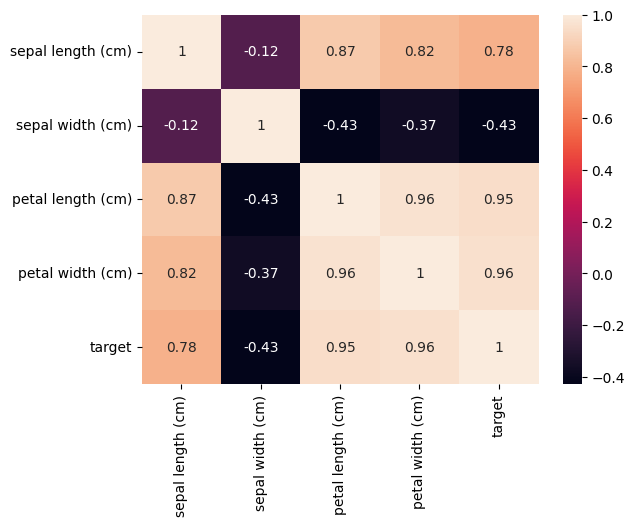

In [59]:
sns.heatmap(df.corr(),annot=True)

In [60]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [61]:
new_df = df[['petal length (cm)','sepal width (cm)']]

In [62]:
new_df['target']=df['target']

C:\Users\HP\AppData\Local\Temp\ipykernel_2300\4223650270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target']=df['target']


In [63]:
new_df

,petal length (cm),sepal width (cm),target
0,1.4,3.5,0
1,1.4,3.0,0
2,1.3,3.2,0
3,1.5,3.1,0
4,1.4,3.6,0
...,...,...,...
145,5.2,3.0,2
146,5.0,2.5,2
147,5.2,3.0,2
148,5.4,3.4,2


In [64]:
x =new_df.drop('target',axis=1)
y=new_df['target']
x.shape,y.shape

((150, 2), (150,))

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 2), (30, 2), (120,), (30,))

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
mms = MinMaxScaler()
mms

MinMaxScaler()

In [68]:
x_train_transformed = mms.fit_transform(x_train)
x_train_transformed

array([[0.05172414, 0.375     ],
       [0.5862069 , 0.20833333],
       [0.63793103, 0.33333333],
       [0.06896552, 0.45833333],
       [0.5       , 0.20833333],
       [0.67241379, 0.20833333],
       [0.53448276, 0.29166667],
       [0.68965517, 0.33333333],
       [0.86206897, 0.41666667],
       [0.96551724, 0.75      ],
       [0.94827586, 0.41666667],
       [0.5862069 , 0.375     ],
       [0.4137931 , 0.        ],
       [0.51724138, 0.29166667],
       [0.5       , 0.25      ],
       [0.0862069 , 0.5       ],
       [0.06896552, 0.75      ],
       [0.81034483, 0.20833333],
       [0.75862069, 0.45833333],
       [0.06896552, 0.58333333],
       [0.65517241, 0.20833333],
       [0.0862069 , 0.75      ],
       [0.9137931 , 0.75      ],
       [0.0862069 , 0.41666667],
       [0.44827586, 0.16666667],
       [0.77586207, 0.375     ],
       [0.72413793, 0.29166667],
       [0.0862069 , 0.58333333],
       [0.65517241, 0.33333333],
       [0.03448276, 0.625     ],
       [0.

In [69]:
x_test_transformed = mms.transform(x_test)
x_test_transformed

array([[ 0.03448276,  0.41666667],
       [ 0.65517241,  0.41666667],
       [ 0.37931034,  0.16666667],
       [ 0.37931034,  0.125     ],
       [ 0.03448276,  0.5       ],
       [ 0.62068966,  0.54166667],
       [-0.01724138,  0.66666667],
       [ 0.10344828,  0.58333333],
       [ 0.70689655,  0.41666667],
       [ 0.5862069 ,  0.41666667],
       [ 0.89655172,  0.375     ],
       [ 0.68965517,  0.45833333],
       [ 0.81034483,  0.41666667],
       [ 0.5862069 ,  0.5       ],
       [ 0.06896552,  0.58333333],
       [ 0.05172414,  0.54166667],
       [ 0.01724138,  0.83333333],
       [ 0.48275862,  0.20833333],
       [ 0.62068966,  0.375     ],
       [ 0.63793103,  0.41666667],
       [ 0.06896552,  0.70833333],
       [ 0.77586207,  0.45833333],
       [ 0.60344828,  0.375     ],
       [ 0.77586207,  0.25      ],
       [ 0.77586207,  0.33333333],
       [ 0.67241379,  0.41666667],
       [ 0.56896552,  0.41666667],
       [ 0.10344828,  0.75      ],
       [ 0.75862069,

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

In [71]:
knn.fit(x_train_transformed,y_train)

KNeighborsClassifier(n_neighbors=3)

In [72]:
y_pred = knn.predict(x_test_transformed)
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0])

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(y_pred,y_test)

0.9333333333333333

---

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
def knn_predict(data, n_neighbors = 3, weights = 'uniform', drop_features = ['petal length (cm)', 'petal width (cm)']):
  data_new = data.drop(drop_features, axis = 1)
  X = data_new.drop('target', axis = 1)
  y = data_new['target']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  X_train_transformed = scaler.fit_transform(X_train)
  knn = KNeighborsClassifier(n_neighbors = 40, metric = 'minkowski', p = 2, weights = 'uniform', n_jobs = -1)
  knn.fit(X_train_transformed, y_train)
  knn.score(X_train_transformed, y_train)

  # Set up mesh grid for decision boundary
  x_min, x_max = X_train_transformed[:, 0].min() - 0.1, X_train_transformed[:, 0].max() + 0.1
  y_min, y_max = X_train_transformed[:, 1].min() - 0.1, X_train_transformed[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                      np.linspace(y_min, y_max, 300))
  # Predict class labels for each point in the mesh
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plotting the decision boundary and data points
  plt.figure(figsize=(10, 6))
  plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
  sns.scatterplot(x=X_train_transformed[:, 0], y=X_train_transformed[:, 1], hue=y_train, palette='Set1', s=60)
  plt.xlabel('Sepal length')
  plt.ylabel('Petal length')
  plt.title('KNN Decision Boundary on Iris Dataset')
  plt.legend(title='target')
  plt.show()

In [76]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

X = iris.data
y = iris.target
X.shape, y.shape

data = pd.DataFrame(X, columns = iris.feature_names)
data['target'] = y
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


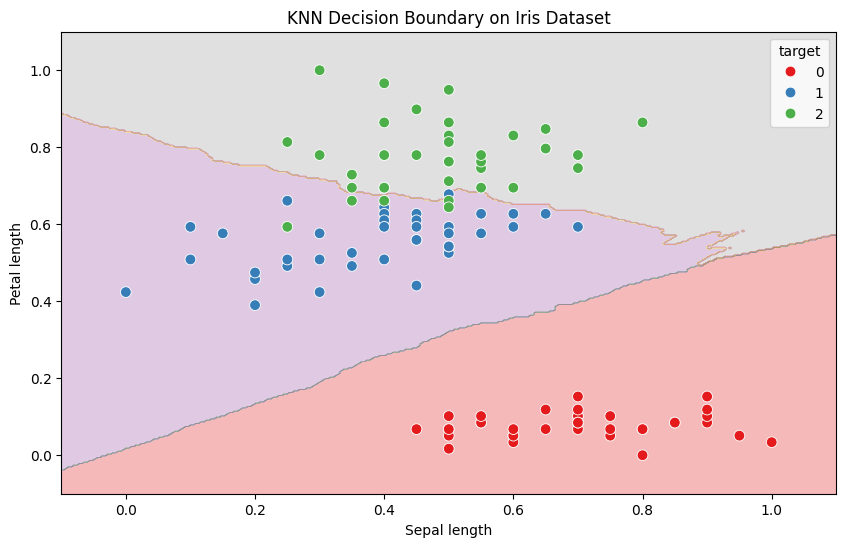

In [77]:
knn_predict(data, n_neighbors = 3, weights = 'uniform', drop_features = ['sepal length (cm)', 'petal width (cm)'])